# 생선의 무게와 크기로 생선 분류 
- 데이터셋 : fish.csv
- 피쳐/입력데이터 : weight, length
- 타겟/클래스/출력 : species 
- 기계학습 방법 : 지도학습 -> 분류
- 분류 알고리즘(문제해결방법) : 미정

## [1] 데이터 살펴보기

In [1]:
## [1] 데이터 살펴보기
### [1-1] 데이터 준비 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 경로 -> 상대경로, 절대경로

# 상대경로 : 현재 파일을 기준으로 경로 설정 
# ./ : 현재 위치 
# ../ : 상위 한 단계 위 위치

DATA_FILE = '../data/fish.csv'

# 절대경로 : 드라이브(C,D,E)를 기준으로 경로 설정 
DATA_FILE = r'C:\Users\KDP-35\Desktop\not_git\ML\DATA\fish.csv' 
# 경로 안 escape 문자 무시 : 맨 앞에 r을 적거나 \를 한 번 더 작성 

In [5]:
# csv -> DataFrame으로 읽어옴
## 첫 번째 줄 : 컬럼명 
## 구분자 : , 
## 로딩컬럼 : 앞에서 3개 -> 0, 1, 2

fish_df = pd.read_csv(DATA_FILE, usecols = [0,1,2]) # 가져올 열을 usecols를 사용해서 열 이름 또는 번호 


In [6]:
# [1-1] 데이터 확인 
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [7]:
# [1-2] 컬럼별 결측치 체크 
## -> isnull() x -> null이 아닐 수 ㅇ 
## -> 컬럼별 고유값 체크 --> 개수 

fish_df.value_counts()

Species    Weight  Length
Roach      160.0   22.5      2
Perch      120.0   22.0      2
Bream      600.0   32.0      2
           700.0   33.0      2
           242.0   25.4      1
                            ..
Perch      100.0   18.0      1
           110.0   21.0      1
                   22.0      1
           115.0   21.0      1
Whitefish  1000.0  40.0      1
Name: count, Length: 155, dtype: int64

In [ ]:
# [1-3] 컬럼별 중복값 체크 
## -> 길이와 무게가 같다고 해서 높이, 너비, 대각선 길이가 같지 않음 
## -> 중복 데이터 유지 

## [2] 피쳐와 타겟의 관계, 피쳐와 피쳐의 관계

In [11]:
# [2] 피쳐와 타겟의 관계, 피쳐와 피쳐의 관계
## [2-1] 피쳐와 타켓의 관계 
## -> 상관계수 확인 

fish_df.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.918618
Length,0.918618,1.000000


In [12]:
## object 타입의 품종을 int로 변환 

fish_df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [42]:
fish_df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [41]:
# ndarray -> list 형 변환 
names = fish_df['Species'].unique().tolist()
names

['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']

In [43]:
{name for name in enumerate(names)} # 인덱스와 키를 함께 가져옴

{(0, 'Bream'),
 (1, 'Roach'),
 (2, 'Whitefish'),
 (3, 'Parkki'),
 (4, 'Perch'),
 (5, 'Pike'),
 (6, 'Smelt')}

In [44]:
# 인덱스를 0부터 안 함

{name for name in enumerate(names,10)} # 인덱스와 키를 함께 가져옴

{(10, 'Bream'),
 (11, 'Roach'),
 (12, 'Whitefish'),
 (13, 'Parkki'),
 (14, 'Perch'),
 (15, 'Pike'),
 (16, 'Smelt')}

In [45]:
{name:idx for idx,name in enumerate(names)} # 딕셔너리 컨프리핸션 (dict comprehension)
# key와 value를 함께 가져옴 

{'Bream': 0,
 'Roach': 1,
 'Whitefish': 2,
 'Parkki': 3,
 'Perch': 4,
 'Pike': 5,
 'Smelt': 6}

In [ ]:
fish_df['Species_number'].str.replace()

In [14]:
fish_df['Species_number'] = fish_df['Species'].replace({'Bream':1, 'Roach':2, 'Whitefish':3, 'Parkki':4, 'Perch':5, 'Pike':6, 'Smelt':7 })

In [15]:
fish_df

,Species,Weight,Length,Species_number
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1
...,...,...,...,...
154,Smelt,12.2,12.2,7
155,Smelt,13.4,12.4,7
156,Smelt,12.2,13.0,7
157,Smelt,19.7,14.3,7


In [16]:
# 7가지 종류에 대한 상관계수 
fish_df.corr(numeric_only=True) 

,Weight,Length,Species_number
Weight,1.000000,0.918618,-0.176783
Length,0.918618,1.000000,-0.118425
Species_number,-0.176783,-0.118425,1.000000


In [22]:
# 도미(Bream)와 빙어(Smelt)에 대한 상관계수 
fish_df_mask = fish_df[(fish_df['Species']=='Bream') | (fish_df['Species']=='Smelt')]
fish_df_mask

,Species,Weight,Length,Species_number
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1
5,Bream,450.0,29.7,1
6,Bream,500.0,29.7,1
7,Bream,390.0,30.0,1
8,Bream,450.0,30.0,1
9,Bream,500.0,30.7,1


In [23]:
fish_df_mask.corr(numeric_only=True)

,Weight,Length,Species_number
Weight,1.000000,0.960347,-0.843828
Length,0.960347,1.000000,-0.944132
Species_number,-0.843828,-0.944132,1.000000


In [34]:
fish_df_mask.loc[fish_df_mask['Species_number']==1]['Weight']

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
5      450.0
6      500.0
7      390.0
8      450.0
9      500.0
10     475.0
11     500.0
12     500.0
13     340.0
14     600.0
15     600.0
16     700.0
17     700.0
18     610.0
19     650.0
20     575.0
21     685.0
22     620.0
23     680.0
24     700.0
25     725.0
26     720.0
27     714.0
28     850.0
29    1000.0
30     920.0
31     955.0
32     925.0
33     975.0
34     950.0
Name: Weight, dtype: float64

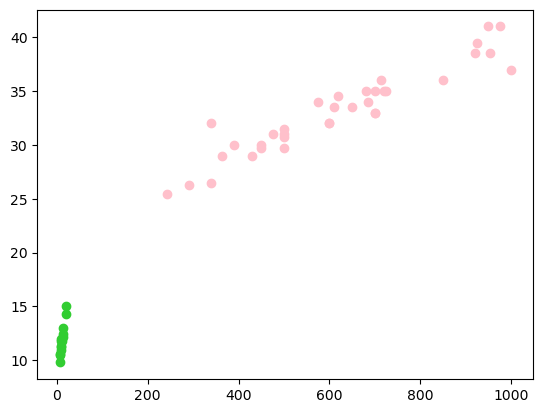

In [38]:
# 도미, 방어에 대한 시각화 

plt.scatter(fish_df_mask.loc[fish_df_mask['Species_number']==1]['Weight'], fish_df_mask.loc[fish_df_mask['Species_number']==1]['Length'], color = 'pink') # Bream
plt.scatter(fish_df_mask.loc[fish_df_mask['Species_number']==7]['Weight'], fish_df_mask.loc[fish_df_mask['Species_number']==7]['Length'], color = 'limegreen') # Smelt
plt.show()

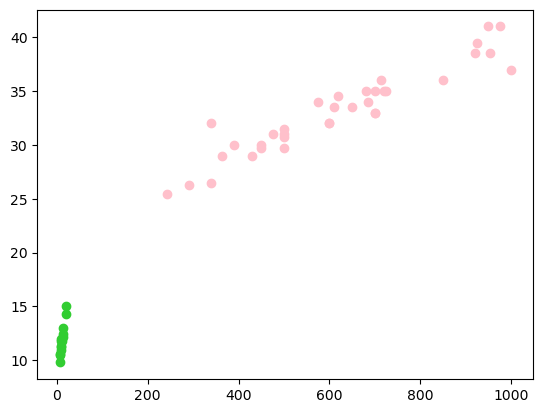

In [39]:
# 도미, 방어에 대한 시각화 

plt.scatter(fish_df_mask.loc[:34,'Weight'],fish_df_mask.loc[:34,'Length'], color = 'pink') # Bream
plt.scatter(fish_df_mask.loc[145:,'Weight'],fish_df_mask.loc[145:,'Length'], color = 'limegreen') # Smelt
plt.show()

## [3] 학습/ 훈련 진행 
- 지도학습 --> 분류
- ML 프레임 워크 -> scikit-learn
- 학습 알고리즘 -> 최근접 이웃 알고리즘 즉, KNN

In [46]:
# 모듈 로딩 
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# [1] 학습 인스턴스 생성 -> 클래스명(매개변수)

model = KNeighborsClassifier() # 모델 생성

In [48]:
print(model)

KNeighborsClassifier()


In [50]:
## 속성 함께 출력 
print(model, model.n_neighbors) 

KNeighborsClassifier() 5


In [52]:
print(model, model.n_neighbors, model.classes_) # _이렇게 끝나는 변수는 모델이 학습 후 정의 됨

AttributeError: 'KNeighborsClassifier' object has no attribute 'classes_'

In [56]:
# [2] 학습/훈련 진행 
# model.fit(피쳐2D, 타겟1D)

feature = fish_df_mask[['Weight','Length']]
target = fish_df_mask['Species_number']
print(f'feature.shape : {feature.shape}, {feature.ndim}D')
print(f'target.shape : {target.shape}, {target.ndim}D')

feature.shape : (49, 2), 2D
target.shape : (49,), 1D


In [57]:
model.fit(feature, target)

KNeighborsClassifier()

In [58]:
print(model, model.n_neighbors, model.classes_) 
# _이렇게 끝나는 변수는 모델이 학습 후 정의 되는 속성 값 (instance)
# 파라미터 이름 : XXX_
# -> model parameter

KNeighborsClassifier() 5 [1 7]


In [59]:
print(model.feature_names_in_) # 

['Weight' 'Length']


## [4] 검증 
- KNN은 모델 즉 규칙 및 패턴이 생성 X 
- 검증 데이터가 입력이 되면 학습 데이터와 거리 측정
- 지정된 K 개수 만큼 검증 데이터와 가까운 데이터 도출 
- 분류일 경우 K 개수 데이터가 가진 라벨/타겟/클래스에 따라 다수결로 결정  

In [61]:
fish_df_mask.head()

,Species,Weight,Length,Species_number
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1


In [73]:
# 검증용으로 사용할 데이터와 타겟 
data = fish_df_mask.loc[0,['Weight','Length']] 
target = fish_df_mask.loc[0,'Species_number']

In [72]:
data.shape, data.ndim

((2,), 1)

In [ ]:
# 검증용으로 사용할 데이터와 타겟 
data = fish_df_mask.loc[[0],['Weight','Length']] # 2D로 변경하기 위해 [] 한 번 더 추가 -> 1x2
target = fish_df_mask.loc[0,'Species_number']

In [74]:
data.shape, data.ndim

((1, 2), 2)

In [78]:
# 새로운 데이터에 대해 결과 예측
# model.predict(2D) -> 1D
pre_target = model.predict(data)
pre_target

array([1], dtype=int64)

In [81]:
list(pre_target)

[1]

In [82]:
pre_target[0]

1

In [80]:
# 예측값과 기존 값 동일 
target == pre_target 

array([ True])

In [83]:
pre_target[0] == target

True

In [85]:
# 여러개의 검정 데이터와 타겟
data = fish_df_mask.loc[:4,['Weight','Length']] 
target = fish_df_mask.loc[:4,'Species_number']

data.shape, data.ndim, target.shape, target.ndim


((5, 2), 2, (5,), 1)

In [86]:
pre_target[0] == target

0    True
1    True
2    True
3    True
4    True
Name: Species_number, dtype: bool

In [88]:
# 예측결과와 정답을 비교해서 점수 도출
# - model.scroe(2D피쳐, 1D타켓)
# - 결과 : 0.0 ~ 1.0 
#  - 1.0에 가까운 것이 좋은 것   

model.score(data,target)
# 일반적으로는 1.0이 잘 안 나옴 

1.0